## Model Recovery

In [98]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.stats import norm
from constrNMPy import constrNMPy
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import ttest_1samp
from load import envir_values
from fitting import IMD,WSLS,Entropy,softmax,GP,heuristic
plt.style.use('default')
plt.style.use('seaborn-v0_8-paper')
custom_colors = [sns.color_palette()[3],sns.color_palette()[0]]

In [3]:
smooth_env = envir_values('smooth')
rough_env = envir_values('rough')

In [4]:
per_gptdata = pd.read_csv('../analysis/per_gptdata.csv',index_col=0)
ids = per_gptdata['id'].unique()

### Data Generation

In [6]:
para_path = 'new_fit/'

##### learning sampling method

In [7]:
# just with the GP+Entropy
# load data
simulation_path = 'new_gene/'
size = 30
options = np.arange(size)
for k in range(len(ids)):
    # load data
    data = per_gptdata[per_gptdata['id']==ids[k]]
    t = data.t.values[0]
    para_file = para_path+f'GP_Entropy_{k}_{t}.csv'
    paras = pd.read_csv(para_file,index_col=0)
    paras = paras.iloc[0,:].values

    # set paras
    number = data.kernel.values[0]
    environment = data.environment.values[0]
    mu = np.array([0. for _ in range(size)])
    sigma = np.array([0.5 for _ in range(size)])
    beta,tau,length = paras[-3],paras[-2],paras[-1]
    kernel = RBF(length_scale = length)
    gp = GaussianProcessRegressor(kernel=kernel,optimizer=None,normalize_y=True)
    xs = []
    zs = []
    trials = []
    if environment == 'smooth':
        env = smooth_env[number]
    else:
        env = rough_env[number]
    horizons = data.horizons.values[0]
    for i in range(horizons+1):
        if i == 0:
            x = np.random.randint(0,size)
            z = env[x]
        else:
            prob = softmax(Entropy(mu,sigma,beta),tau)
            x = np.random.choice(range(size),p=prob,size = 1)[0]
            z = env[x]
        xs.append(x)
        zs.append(z)
        trials.append(i)
        gp.fit(np.array(x).reshape(-1,1),np.array(z).reshape(-1,1))
        mu,sigma = gp.predict(np.arange(size).reshape(-1,1),return_std=True)
    
    # save paras
    sub_data = pd.DataFrame({'trials':trials,'x':xs,'z':zs})
    sub_data['horizons'] = horizons
    sub_data['environment'] = environment
    sub_data['id'] = ids[k]

    file_name = simulation_path+f'GP_Entropy_{k}_{t}.csv'
    sub_data.to_csv(file_name)
    print(f'{k} is done')

0 is done
1 is done
2 is done
3 is done
4 is done
5 is done
6 is done
7 is done
8 is done
9 is done
10 is done
11 is done
12 is done
13 is done
14 is done
15 is done
16 is done
17 is done
18 is done
19 is done
20 is done
21 is done
22 is done
23 is done
24 is done
25 is done
26 is done
27 is done
28 is done
29 is done
30 is done
31 is done
32 is done
33 is done
34 is done
35 is done
36 is done
37 is done
38 is done
39 is done
40 is done
41 is done
42 is done
43 is done
44 is done
45 is done
46 is done
47 is done
48 is done
49 is done
50 is done
51 is done
52 is done
53 is done
54 is done
55 is done
56 is done
57 is done
58 is done
59 is done
60 is done
61 is done
62 is done
63 is done
64 is done
65 is done
66 is done
67 is done
68 is done
69 is done
70 is done
71 is done
72 is done
73 is done
74 is done
75 is done
76 is done
77 is done
78 is done
79 is done
80 is done
81 is done
82 is done
83 is done
84 is done
85 is done
86 is done
87 is done
88 is done
89 is done
90 is done
91 is don

##### heuristics

In [80]:
# heuristics
# WSLS
size = 30
options = np.arange(size)
for k in range(len(ids)):
    # load data
    data = per_gptdata[per_gptdata['id']==ids[k]]
    t = data.t.values[0]
    para_file = para_path+f'heuristics_WSLS_{k}_{t}.csv'
    paras = pd.read_csv(para_file,index_col=0)
    paras = paras.iloc[0,:].values

    # set paras
    number = data.kernel.values[0]
    environment = data.environment.values[0]
    tau = paras[-1]
    xs = []
    zs = []
    trials = []
    if environment == 'smooth':
        env = smooth_env[number]
    else:
        env = rough_env[number]
    horizons = data.horizons.values[0]
    for i in range(horizons+1):
        if i == 0:
            x = np.random.randint(0,size)
            z = env[x]
        else:
            prob = softmax(WSLS(np.array(xs),np.array(zs)),tau)
            x = np.random.choice(range(size),p=prob,size = 1)[0]
            z = env[x]
        xs.append(x)
        zs.append(z)
        trials.append(i)

    # save paras
    sub_data = pd.DataFrame({'trials':trials,'x':xs,'z':zs})
    sub_data['horizons'] = horizons
    sub_data['environment'] = environment
    sub_data['id'] = ids[k]

    file_name = simulation_path+f'WSLS_{k}_{t}.csv'
    sub_data.to_csv(file_name)
    print(f'{k} is done')

0 is done
1 is done
2 is done
3 is done
4 is done
5 is done
6 is done
7 is done
8 is done
9 is done
10 is done
11 is done
12 is done
13 is done
14 is done
15 is done
16 is done
17 is done
18 is done
19 is done
20 is done
21 is done
22 is done
23 is done
24 is done
25 is done
26 is done
27 is done
28 is done
29 is done
30 is done
31 is done
32 is done
33 is done
34 is done
35 is done
36 is done
37 is done
38 is done
39 is done
40 is done
41 is done
42 is done
43 is done
44 is done
45 is done
46 is done
47 is done
48 is done
49 is done
50 is done
51 is done
52 is done
53 is done
54 is done
55 is done
56 is done
57 is done
58 is done
59 is done
60 is done
61 is done
62 is done
63 is done
64 is done
65 is done
66 is done
67 is done
68 is done
69 is done
70 is done
71 is done
72 is done
73 is done
74 is done
75 is done
76 is done
77 is done
78 is done
79 is done
80 is done
81 is done
82 is done
83 is done
84 is done
85 is done
86 is done
87 is done
88 is done
89 is done
90 is done
91 is don

In [81]:
# heuristics
# IMD
size = 30
options = np.arange(size)
for k in range(len(ids)):
    # load data
    data = per_gptdata[per_gptdata['id']==ids[k]]
    t = data.t.values[0]
    para_file = para_path+f'heuristics_IMD_{k}_{t}.csv'
    paras = pd.read_csv(para_file,index_col=0)
    paras = paras.iloc[0,:].values

    # set paras
    number = data.kernel.values[0]
    environment = data.environment.values[0]
    beta,tau = paras[-2],paras[-1]
    xs = []
    zs = []
    trials = []
    if environment == 'smooth':
        env = smooth_env[number]
    else:
        env = rough_env[number]
    horizons = data.horizons.values[0]
    for i in range(horizons+1):
        if i == 0:
            x = np.random.randint(0,size)
            z = env[x]
        else:
            prob = softmax(IMD(x=np.array(xs),y=np.array(zs),beta=beta,horizon=horizons,iter=i),tau)
            x = np.random.choice(range(size),p=prob,size = 1)[0]
            z = env[x]
        xs.append(x)
        zs.append(z)
        trials.append(i)

    # save paras
    sub_data = pd.DataFrame({'trials':trials,'x':xs,'z':zs})
    sub_data['horizons'] = horizons
    sub_data['environment'] = environment
    sub_data['id'] = ids[k]

    file_name = simulation_path+f'IMD_{k}_{t}.csv'
    sub_data.to_csv(file_name)
    print(f'{k} is done')

0 is done
1 is done
2 is done
3 is done
4 is done
5 is done
6 is done
7 is done
8 is done
9 is done
10 is done
11 is done
12 is done
13 is done
14 is done
15 is done
16 is done
17 is done
18 is done
19 is done
20 is done
21 is done
22 is done
23 is done
24 is done
25 is done
26 is done
27 is done
28 is done
29 is done
30 is done
31 is done
32 is done
33 is done
34 is done
35 is done
36 is done
37 is done
38 is done
39 is done
40 is done
41 is done
42 is done
43 is done
44 is done
45 is done
46 is done
47 is done
48 is done
49 is done
50 is done
51 is done
52 is done
53 is done
54 is done
55 is done
56 is done
57 is done
58 is done
59 is done
60 is done
61 is done
62 is done
63 is done
64 is done
65 is done
66 is done
67 is done
68 is done
69 is done
70 is done
71 is done
72 is done
73 is done
74 is done
75 is done
76 is done
77 is done
78 is done
79 is done
80 is done
81 is done
82 is done
83 is done
84 is done
85 is done
86 is done
87 is done
88 is done
89 is done
90 is done
91 is don

In [82]:
# 整合数据
import os
import pandas as pd

# 指定文件夹路径
folder_path = 'new_gene/'

# 获取文件夹中以GP开头的所有CSV文件
Model_name = ['GP','WSLS','IMD']
for i in range(len(Model_name)):  
    name = Model_name[i]            
    file_list = [file for file in os.listdir(folder_path) if file.startswith(name) and file.endswith('.csv')]

    # 创建一个空的DataFrame来存储合并后的数据
    merged_data = pd.DataFrame()

    # 逐个读取并合并CSV文件
    for file in file_list:
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        merged_data = pd.concat([merged_data, df],ignore_index=True)

    # 保存合并后的数据为一个CSV文件
    merged_data.to_csv(name+'.csv', index=False)

### Paras fitting

In [83]:
gpdata = pd.read_csv('GP.csv')
wsdata = pd.read_csv('WSLS.csv')
imdata = pd.read_csv('IMD.csv')
imdata['z'] = imdata['z']*100
imdata['agent'] = 'model'

common_columns = per_gptdata.columns.intersection(imdata.columns)

# 只合并这些列
fulldata = pd.concat([per_gptdata[common_columns], imdata[common_columns]], axis=0,ignore_index=True)

In [84]:
fulldata['agent'] = fulldata['agent'].replace('per_gpt','gpt')

c:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Liangst.687\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

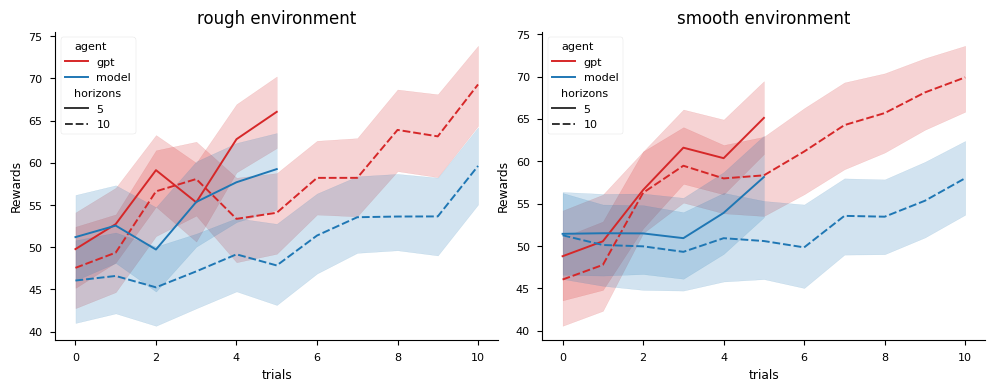

In [90]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
envs = ['rough','smooth']
for i in range(len(envs)):
    ax = axes[i]
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none') 
    sns.lineplot(x='trials',y='z',style='horizons',hue='agent',palette=custom_colors,data=fulldata[fulldata.environment == envs[i]],ax=ax)
    ax.set_title(envs[i] + ' environment',fontsize = 12)
    ax.set_ylabel('Rewards')

plt.subplots_adjust(wspace=0.1)
plt.show()


In [24]:
path = 'recovery_fitting/'


In [25]:
# start to fit with learning and decision making model
dfs = [gpdata,wsdata,imdata]
methods = ['IMD','WSLS']
datasets = ['gp','ws','im']
ids = per_gptdata.id.unique()
for i in range(len(dfs)):   
    df = dfs[i]
    dataset = datasets[i]
    for j in range(len(methods)):
        method = methods[j]
        for k in range(len(ids)):
            data = df[df.id == ids[k]]
            paras = []
            N_random=10               #重复取值10次
            optimal=[]
            args = [method,data]
            for _ in range(N_random):  
                if j == 0:
                    LB = [1e-16]*2;UB = [10-1e-16]*2
                    x0 = np.random.uniform(0, 3, 2)
                else:   
                    LB = [1e-16];UB = [10-1e-16]
                    x0 = np.random.uniform(0, 3, 1)
                xopt = constrNMPy.constrNM(heuristic, x0, LB, UB, args=args)
                optimal.append(xopt['xopt'])
                print(f' dataset {dataset} {method} sub{k}/{len(ids)} iter{_} finished')
            y = list(map(lambda x: heuristic(x,method,data), optimal))
            opt = optimal[y.index(min(y))]
            # 保存最优参数
            for t in range(len(data)):
                paras.append(opt)
            
            if j == 1:
                columns = ['tau']
            else:
                columns = ['beta','tau']
            file_name = f'data_{dataset}_{method}_{k}.csv'
            paras = pd.DataFrame(paras,columns=columns)
            paras.to_csv(path+file_name)

 dataset gp IMD sub0/80 iter0 finished
 dataset gp IMD sub0/80 iter1 finished
 dataset gp IMD sub0/80 iter2 finished
 dataset gp IMD sub0/80 iter3 finished
 dataset gp IMD sub0/80 iter4 finished
 dataset gp IMD sub0/80 iter5 finished
 dataset gp IMD sub0/80 iter6 finished
 dataset gp IMD sub0/80 iter7 finished
 dataset gp IMD sub0/80 iter8 finished
 dataset gp IMD sub0/80 iter9 finished
 dataset gp IMD sub1/80 iter0 finished
 dataset gp IMD sub1/80 iter1 finished
 dataset gp IMD sub1/80 iter2 finished
 dataset gp IMD sub1/80 iter3 finished
 dataset gp IMD sub1/80 iter4 finished
 dataset gp IMD sub1/80 iter5 finished
 dataset gp IMD sub1/80 iter6 finished
 dataset gp IMD sub1/80 iter7 finished
 dataset gp IMD sub1/80 iter8 finished
 dataset gp IMD sub1/80 iter9 finished
 dataset gp IMD sub2/80 iter0 finished
 dataset gp IMD sub2/80 iter1 finished
 dataset gp IMD sub2/80 iter2 finished
 dataset gp IMD sub2/80 iter3 finished
 dataset gp IMD sub2/80 iter4 finished
 dataset gp IMD sub2/80 i

In [26]:
# start to fit with learning and decision making model
dfs = [gpdata,wsdata,imdata]
methods = ['Entropy']
datasets = ['gp','ws','im']
ids = per_gptdata.id.unique()
for i in range(len(dfs)):   
    df = dfs[i]
    dataset = datasets[i]
    for j in range(len(methods)):
        method = methods[j]
        for k in range(len(ids)):
            data = df[df.id == ids[k]]
            paras = []
            N_random=10               #重复取值10次
            optimal=[]
            args = [method,data]
            for _ in range(N_random):  
                LB = [1e-16]*3;UB = [10-1e-16]*3
                x0 = np.random.uniform(0, 3, 3)
                xopt = constrNMPy.constrNM(GP, x0, LB, UB, args=args)
                optimal.append(xopt['xopt'])
                print(f' dataset {dataset} {method} sub{k}/{len(ids)} iter{_} finished')
            y = list(map(lambda x: heuristic(x,method,data), optimal))
            opt = optimal[y.index(min(y))]
            # 保存最优参数
            for t in range(len(data)):
                paras.append(opt)
                columns = ['beta','tau','length']
            file_name = f'data_{dataset}_{method}_{k}.csv'
            paras = pd.DataFrame(paras,columns=columns)
            paras.to_csv(path+file_name)

 dataset gp Entropy sub0/80 iter0 finished
 dataset gp Entropy sub0/80 iter1 finished
 dataset gp Entropy sub0/80 iter2 finished
 dataset gp Entropy sub0/80 iter3 finished
 dataset gp Entropy sub0/80 iter4 finished
 dataset gp Entropy sub0/80 iter5 finished
 dataset gp Entropy sub0/80 iter6 finished
 dataset gp Entropy sub0/80 iter7 finished
 dataset gp Entropy sub0/80 iter8 finished
 dataset gp Entropy sub0/80 iter9 finished
 dataset gp Entropy sub1/80 iter0 finished
 dataset gp Entropy sub1/80 iter1 finished
 dataset gp Entropy sub1/80 iter2 finished
 dataset gp Entropy sub1/80 iter3 finished
 dataset gp Entropy sub1/80 iter4 finished
 dataset gp Entropy sub1/80 iter5 finished
 dataset gp Entropy sub1/80 iter6 finished
 dataset gp Entropy sub1/80 iter7 finished
 dataset gp Entropy sub1/80 iter8 finished
 dataset gp Entropy sub1/80 iter9 finished
 dataset gp Entropy sub2/80 iter0 finished
 dataset gp Entropy sub2/80 iter1 finished
 dataset gp Entropy sub2/80 iter2 finished
 dataset gp

#### 比较差异

In [94]:
path = 'new_fit/'
per_gptdata = pd.read_csv('../analysis/per_gptdata.csv',index_col=0)
ids = per_gptdata['id'].unique()
fitted_paras = pd.DataFrame(columns=['beta','tau','horizons','environment','id'])
for i in range(len(ids)):
    data = per_gptdata[per_gptdata['id']==ids[i]]
    t = data.t.values[0]
    fitted_data = pd.read_csv(path+f'heuristics_IMD_{i}_{t}.csv',index_col=0)
    horizons = data.horizons.values[0]
    environment = data.environment.values[0]    
    beta = fitted_data.beta.values[0]
    tau = fitted_data.tau.values[0]
    fitted_paras = pd.concat([fitted_paras,pd.DataFrame({'beta':[beta],'tau':[tau],'horizons':[horizons],'environment':[environment],'id':[ids[i]],'t':[t]})],ignore_index=True)
fitted_paras.to_csv('fitted_data.csv')

C:\Users\Liangst.687\AppData\Local\Temp\ipykernel_24092\80581685.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fitted_paras = pd.concat([fitted_paras,pd.DataFrame({'beta':[beta],'tau':[tau],'horizons':[horizons],'environment':[environment],'id':[ids[i]],'t':[t]})],ignore_index=True)


In [99]:
ttest_1samp(fitted_paras.beta,0)

Ttest_1sampResult(statistic=9.80089924862401, pvalue=1.0005339588442651e-20)

In [100]:
np.mean(fitted_paras.beta)

0.3099196308915125

In [103]:
np.sum(fitted_paras.beta<1e-6)

116

In [102]:
np.sum(fitted_paras.beta<1e-6)/len(fitted_paras)

0.2510822510822511

In [33]:
pg.anova(data=fitted_paras,dv='beta',between=['environment','horizons'])

,Source,SS,DF,MS,F,p-unc,np2
0,environment,0.001106,1.0,0.001106,0.001636,0.967838,0.000022
1,horizons,0.494743,1.0,0.494743,0.731855,0.394972,0.009538
2,environment * horizons,0.878020,1.0,0.878020,1.298822,0.258008,0.016803
3,Residual,51.376929,76.0,0.676012,NaN,NaN,NaN


In [34]:
pg.anova(data=fitted_paras,dv='tau',between=['environment','horizons'])

,Source,SS,DF,MS,F,p-unc,np2
0,environment,6.400820e-06,1.0,6.400820e-06,0.906376,0.344096,0.011785
1,horizons,7.411733e-07,1.0,7.411733e-07,0.104952,0.746855,0.001379
2,environment * horizons,9.711355e-08,1.0,9.711355e-08,0.013752,0.906958,0.000181
3,Residual,5.367115e-04,76.0,7.061993e-06,NaN,NaN,NaN
